In [ ]:
from google.colab import files
files.upload()

Saving WineQT.csv to WineQT.csv


{'WineQT.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id\r\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0\r\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1\r\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2\r\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3\r\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4\r\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5\r\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5,6\r\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7\r\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8\r\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5,10\r\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5,12\r\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,13\r\n8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5,7,16\r\n7.9,

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

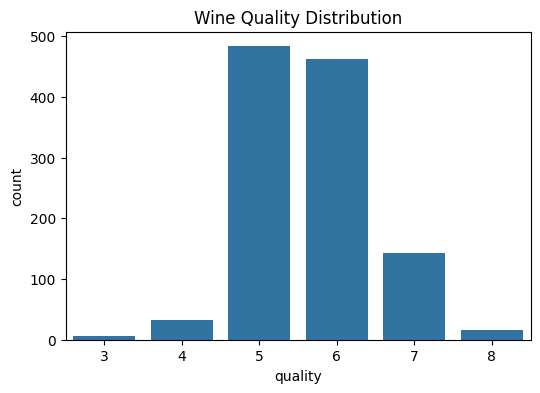

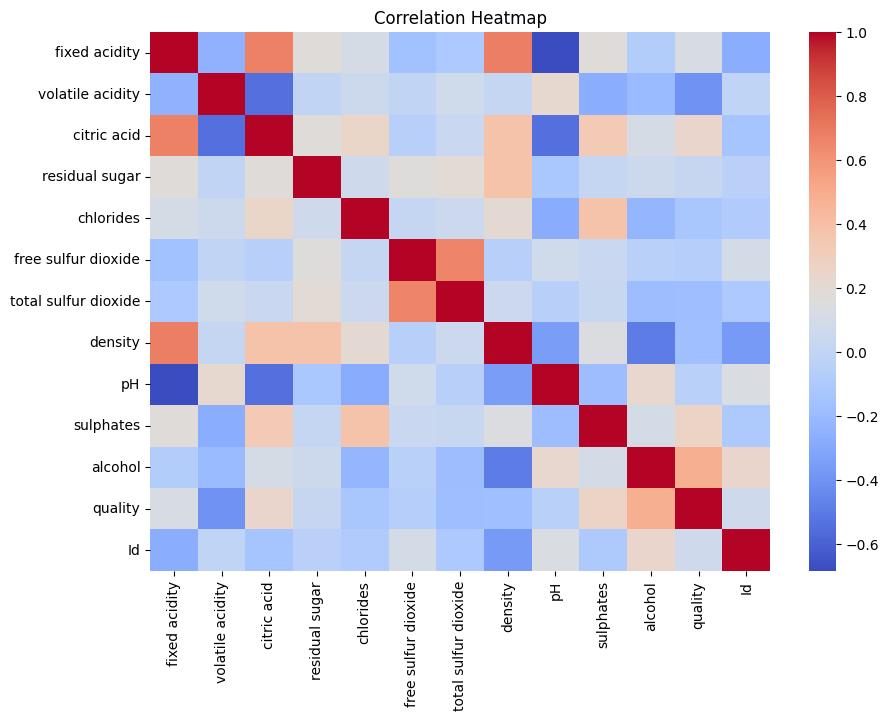


Random Forest Results
Accuracy: 0.9213973799126638
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       197
           1       0.77      0.62      0.69        32

    accuracy                           0.92       229
   macro avg       0.86      0.80      0.82       229
weighted avg       0.92      0.92      0.92       229


SGD Classifier Results
Accuracy: 0.9082969432314411
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       197
           1       0.69      0.62      0.66        32

    accuracy                           0.91       229
   macro avg       0.81      0.79      0.80       229
weighted avg       0.91      0.91      0.91       229


Support Vector Classifier Results
Accuracy: 0.8995633187772926
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       197
           1       0.76      0.41      0.53        32

    accuracy 

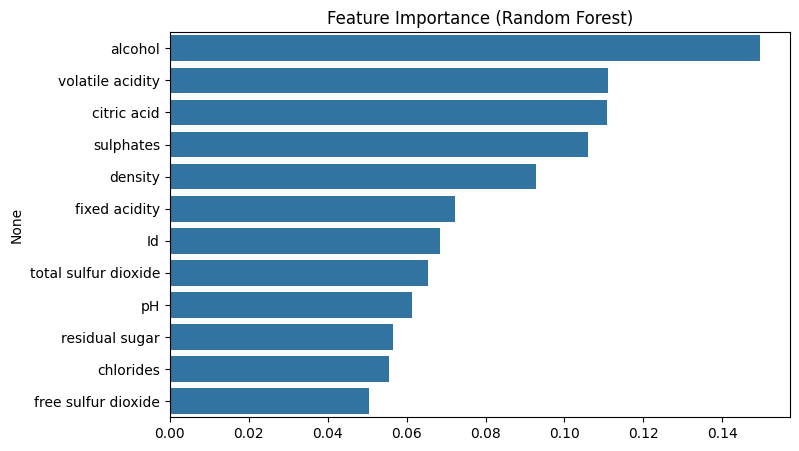

In [ ]:
# Wine Quality Prediction - Single Page Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# 1. Load Dataset

df = pd.read_csv("WineQT.csv")


# 2. Basic EDA

print(df.head())
print(df.info())
print(df.describe())

plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df)
plt.title("Wine Quality Distribution")
plt.show()

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 3. Data Preprocessing
# Binary classification: Good (>=7) vs Bad (<7)

df["quality_label"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

X = df.drop(["quality", "quality_label"], axis=1)
y = df["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 4. Random Forest Classifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Stochastic Gradient Descent Classifier

sgd = SGDClassifier(loss="log_loss", random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

print("\nSGD Classifier Results")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))

# Support Vector Classifier

svc = SVC(kernel="rbf", C=1.0, gamma="scale")
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("\nSupport Vector Classifier Results")
print("Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

# Feature Importance (Random Forest)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()


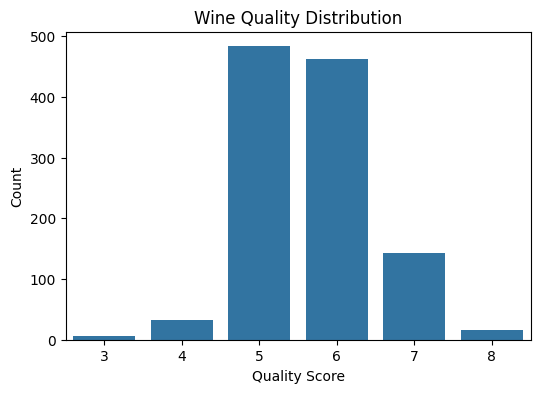

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df)
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

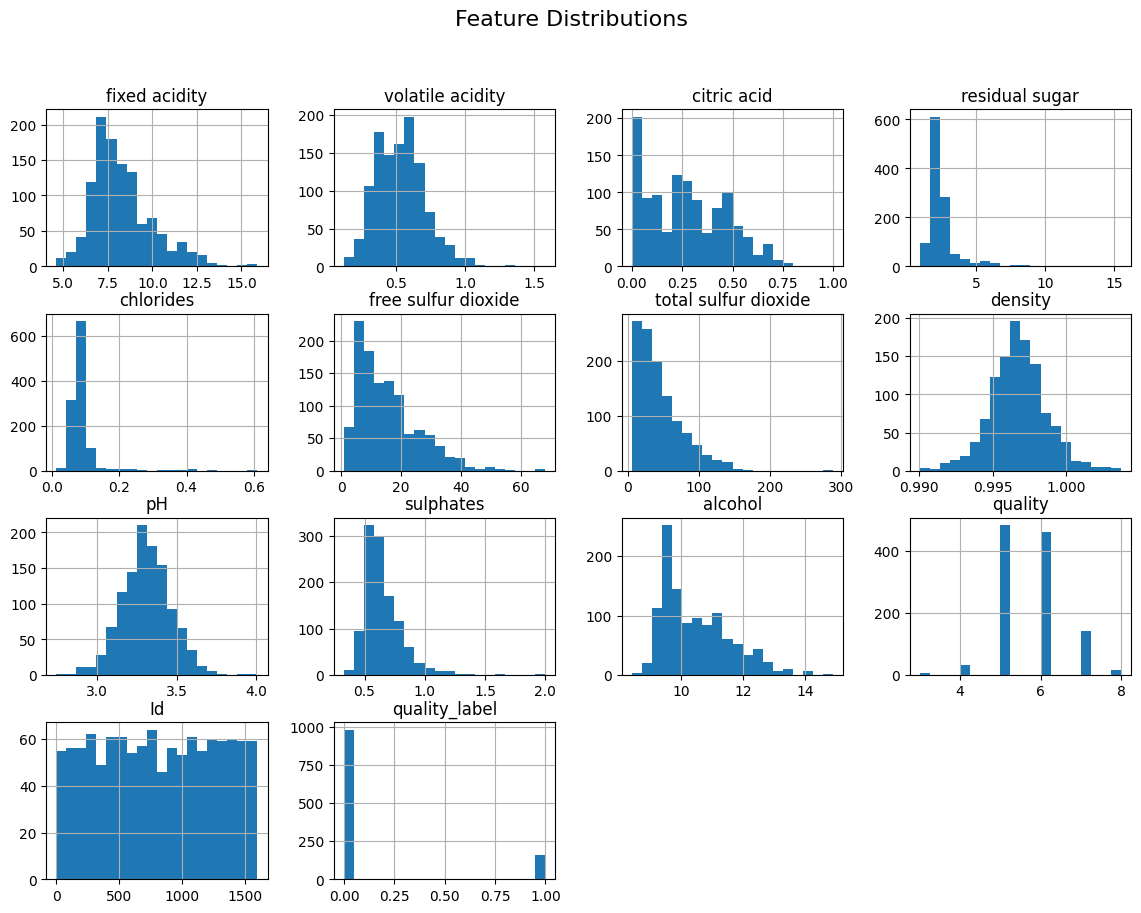

In [ ]:
df.hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

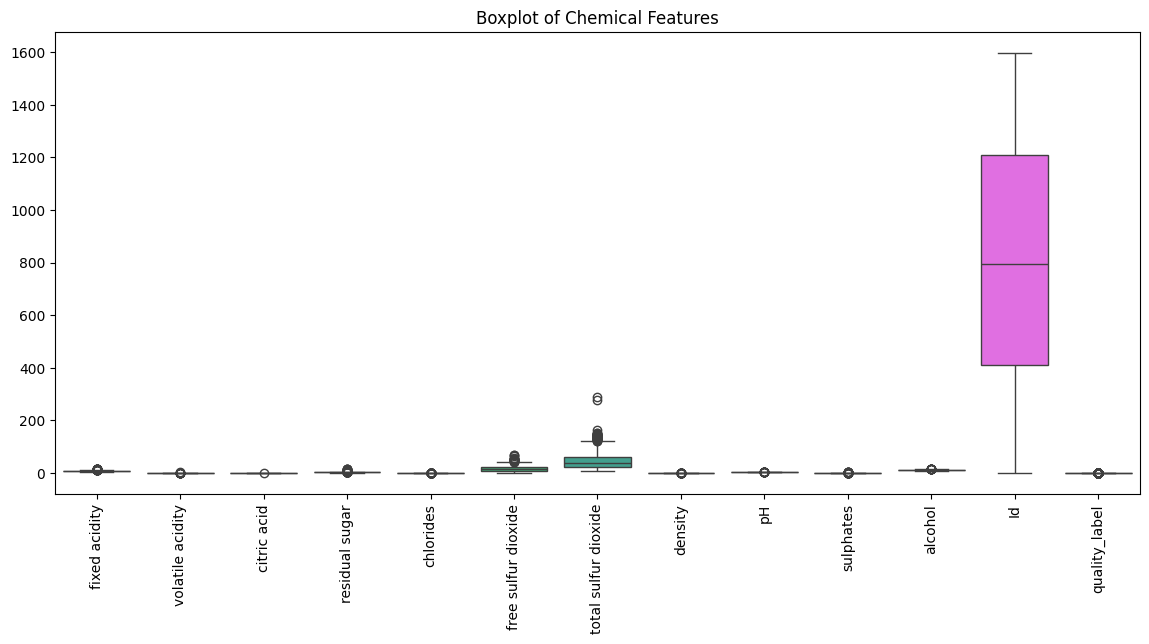

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df.drop("quality", axis=1))
plt.xticks(rotation=90)
plt.title("Boxplot of Chemical Features")
plt.show()

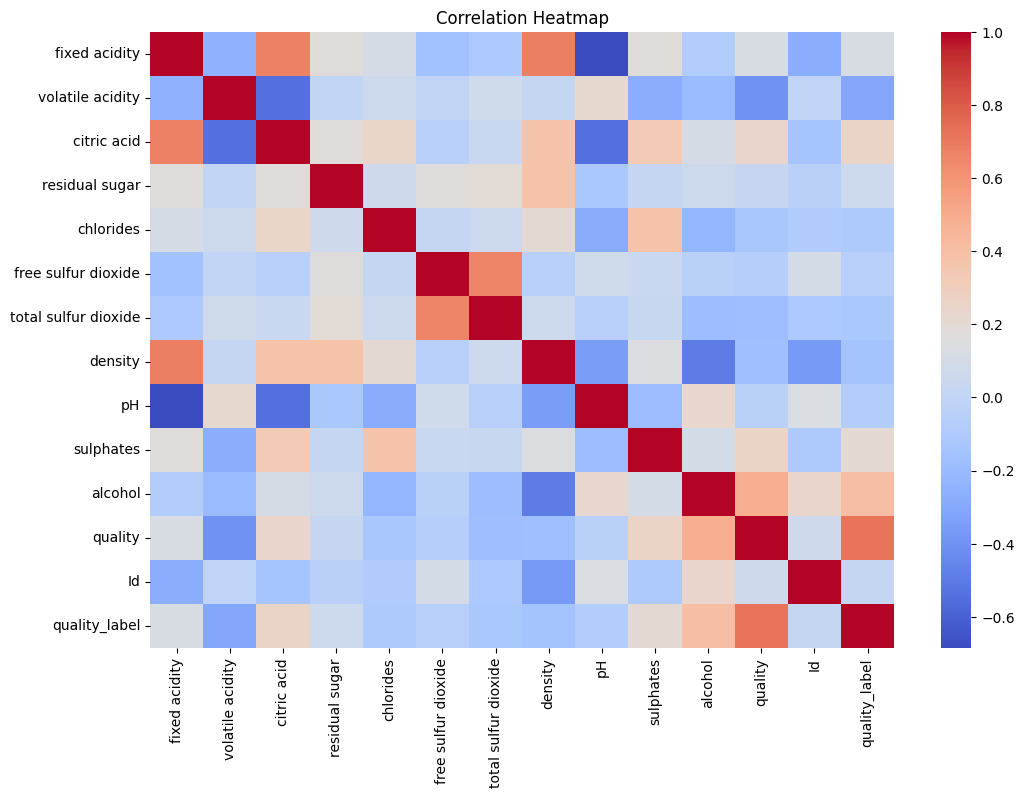

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

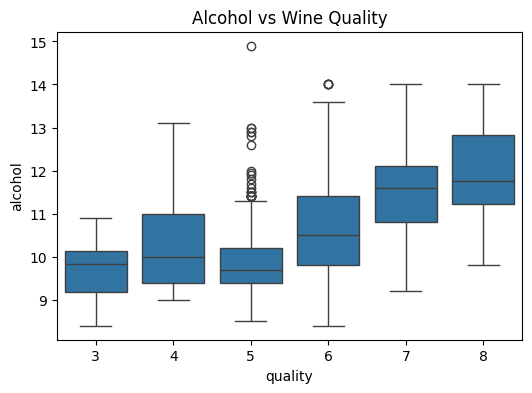

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="alcohol", data=df)
plt.title("Alcohol vs Wine Quality")
plt.show()

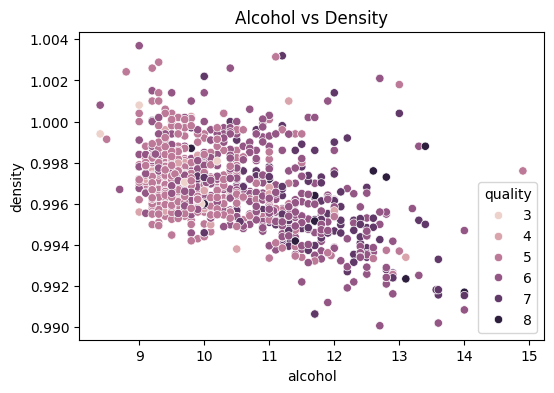

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="alcohol", y="density", hue="quality", data=df)
plt.title("Alcohol vs Density")
plt.show()

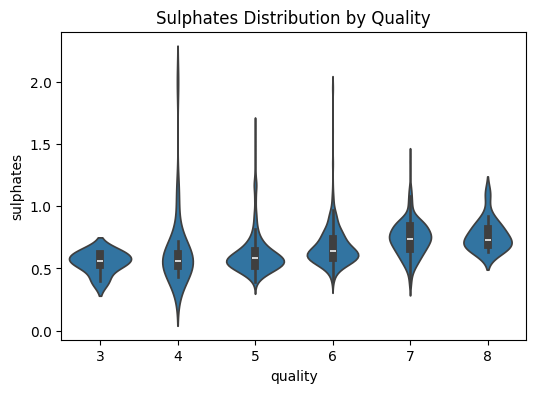

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(x="quality", y="sulphates", data=df)
plt.title("Sulphates Distribution by Quality")
plt.show()